In [21]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('fivethirtyeight')

highway = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
highway.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
highway.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
print(f'\033[1mNumber of rows:\033[0m\t\t  {highway.shape[0]:,}'
      f'\n\033[1mNumber of columns:\033[0m \t  {highway.shape[1]:,}'
      f'\n\033[1mNumber of missing values:\033[0m {highway.isnull().sum().sum()}'
      f'\n\n\033[1mCOLUMN NAMES:\033[0m \n{highway.columns.to_list()}'
      f'\n\n\033[1mDATA TYPES:\033[0m \n{highway.dtypes}')

Number of rows:		  48,204
Number of columns: 	  9
Number of missing values: 0

COLUMN NAMES: 
['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description', 'date_time', 'traffic_volume']

DATA TYPES: 
holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object


## Analyzing Traffic Volume


count    48204.0
mean      3260.0
std       1987.0
min          0.0
25%       1193.0
50%       3380.0
75%       4933.0
max       7280.0
Name: traffic_volume, dtype: float64

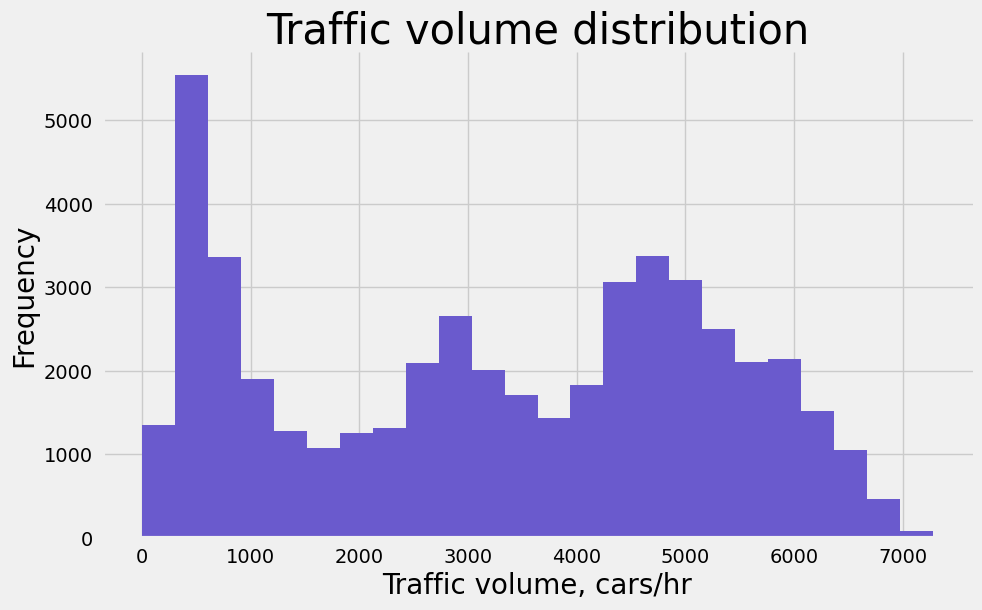

In [23]:
plt.figure(figsize=(10,6))

def create_hist(df, bins, color, title, title_font, axis_font, tick_font):
    plt.hist(df['traffic_volume'], bins=bins, color=color)
    plt.title(title, fontsize=title_font)
    plt.xlabel('Traffic volume, cars/hr', fontsize=axis_font)
    plt.ylabel('Frequency', fontsize=axis_font)
    plt.xticks(fontsize=tick_font)
    plt.yticks(fontsize=tick_font)
    sns.despine()

# Plotting the overall distribution of traffic volume
create_hist(df=highway, bins=24, color='slateblue',
            title='Traffic volume distribution',
            title_font=30, axis_font=20, tick_font=14)
            
round(highway['traffic_volume'].describe())

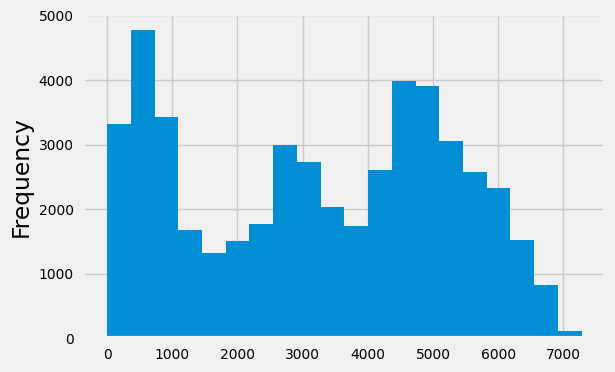

In [22]:
highway['traffic_volume'].plot.hist(bins=20)
plt.show()

In [6]:
highway['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

## Traffic Volume: Day vs. Night


In [7]:
highway['date_time'] = pd.to_datetime(highway['date_time'])

daytime = highway.copy()[(highway['date_time'].dt.hour >= 7) & 
                  (highway['date_time'].dt.hour < 19) ]



nighttime = highway.copy()[(highway['date_time'].dt.hour < 7) | 
                  (highway['date_time'].dt.hour >= 19) ]

print(daytime.shape)
print(nighttime.shape)

(23877, 9)
(24327, 9)


## Traffic Volume: Day vs. Night (II)


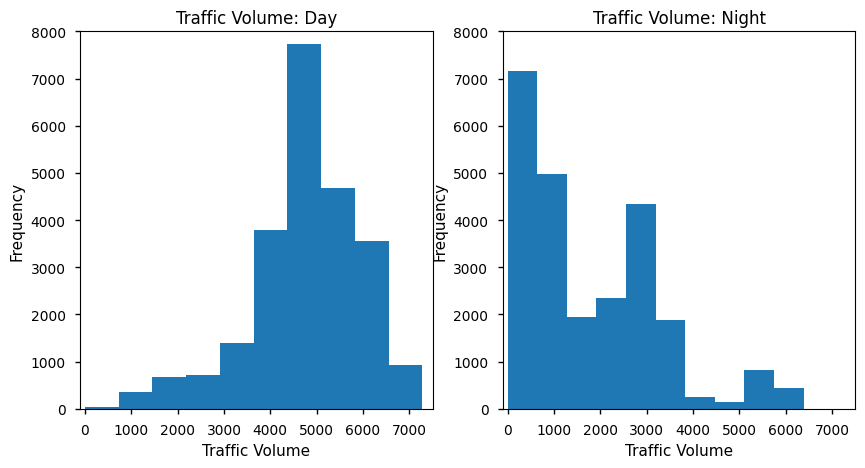

In [8]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(nighttime['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [9]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Time Indicators


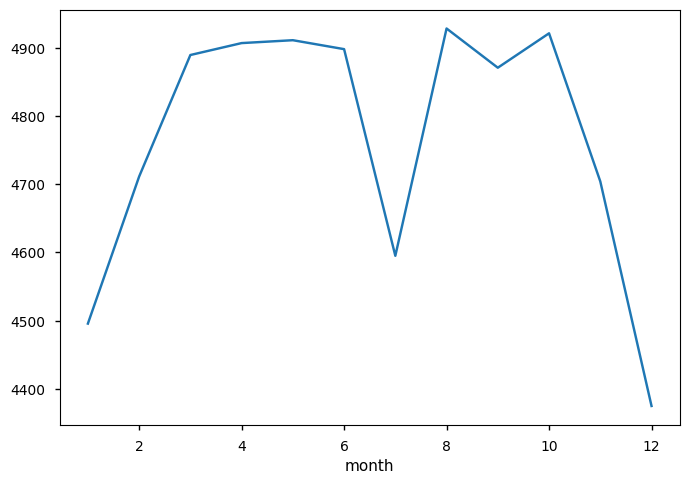

In [11]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

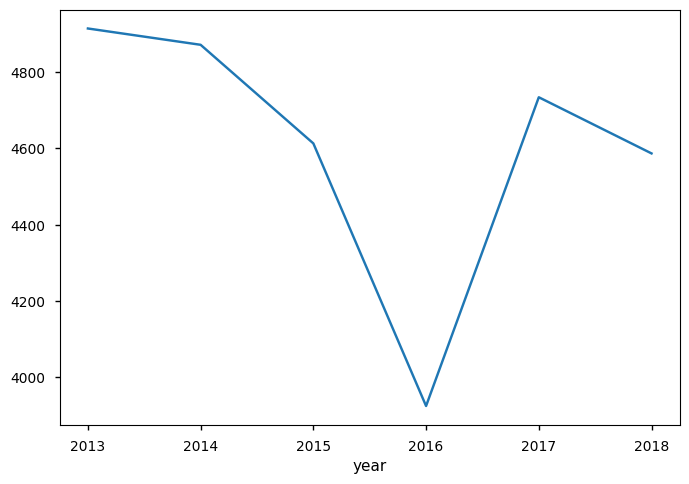

In [12]:
daytime['year'] = daytime['date_time'].dt.year
only_july = daytime[daytime['month'] == 7]
by_year_july = only_july.groupby('year').mean()
by_year_july['traffic_volume'].plot.line()
plt.show()

## Time Indicators (II)


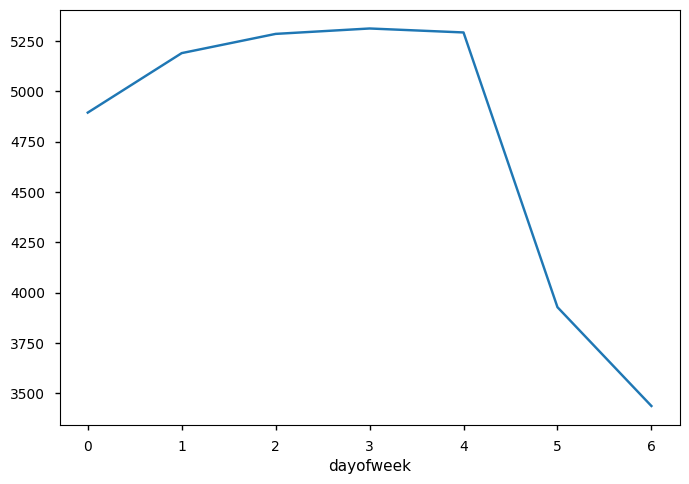

In [13]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

## Time Indicators (III)


In [14]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4]
weekend = daytime.copy()[daytime['dayofweek'] >= 5]

by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


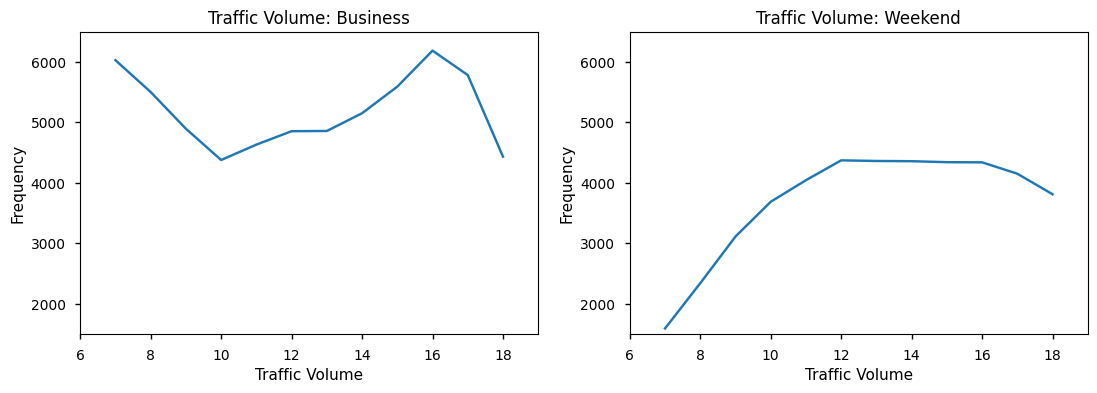

In [15]:
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.ylim(1500, 6500)
plt.xlim(6, 19)
plt.title('Traffic Volume: Business')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.ylim(1500, 6500)
plt.xlim(6, 19)
plt.title('Traffic Volume: Weekend')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()




- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather Indicators


Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical, so let's start by looking up their correlation values with traffic_volume.

In [16]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

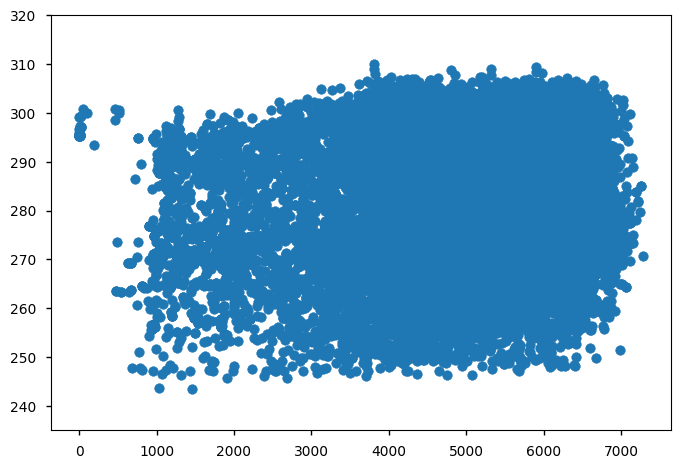

In [17]:
plt.scatter(daytime['traffic_volume'],daytime['temp'])
plt.ylim(235,320)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

In [18]:
by_weather_main = daytime.groupby('weather_main').mean().sort_values('traffic_volume')
by_weather_description = daytime.groupby('weather_description').mean().sort_values('traffic_volume')

We grouped the data by weather_main and weather_description while using the mean as an aggregate function.

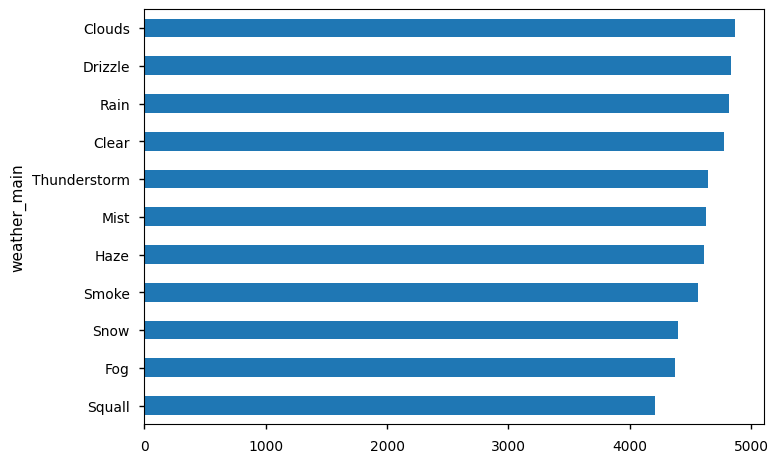

In [19]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

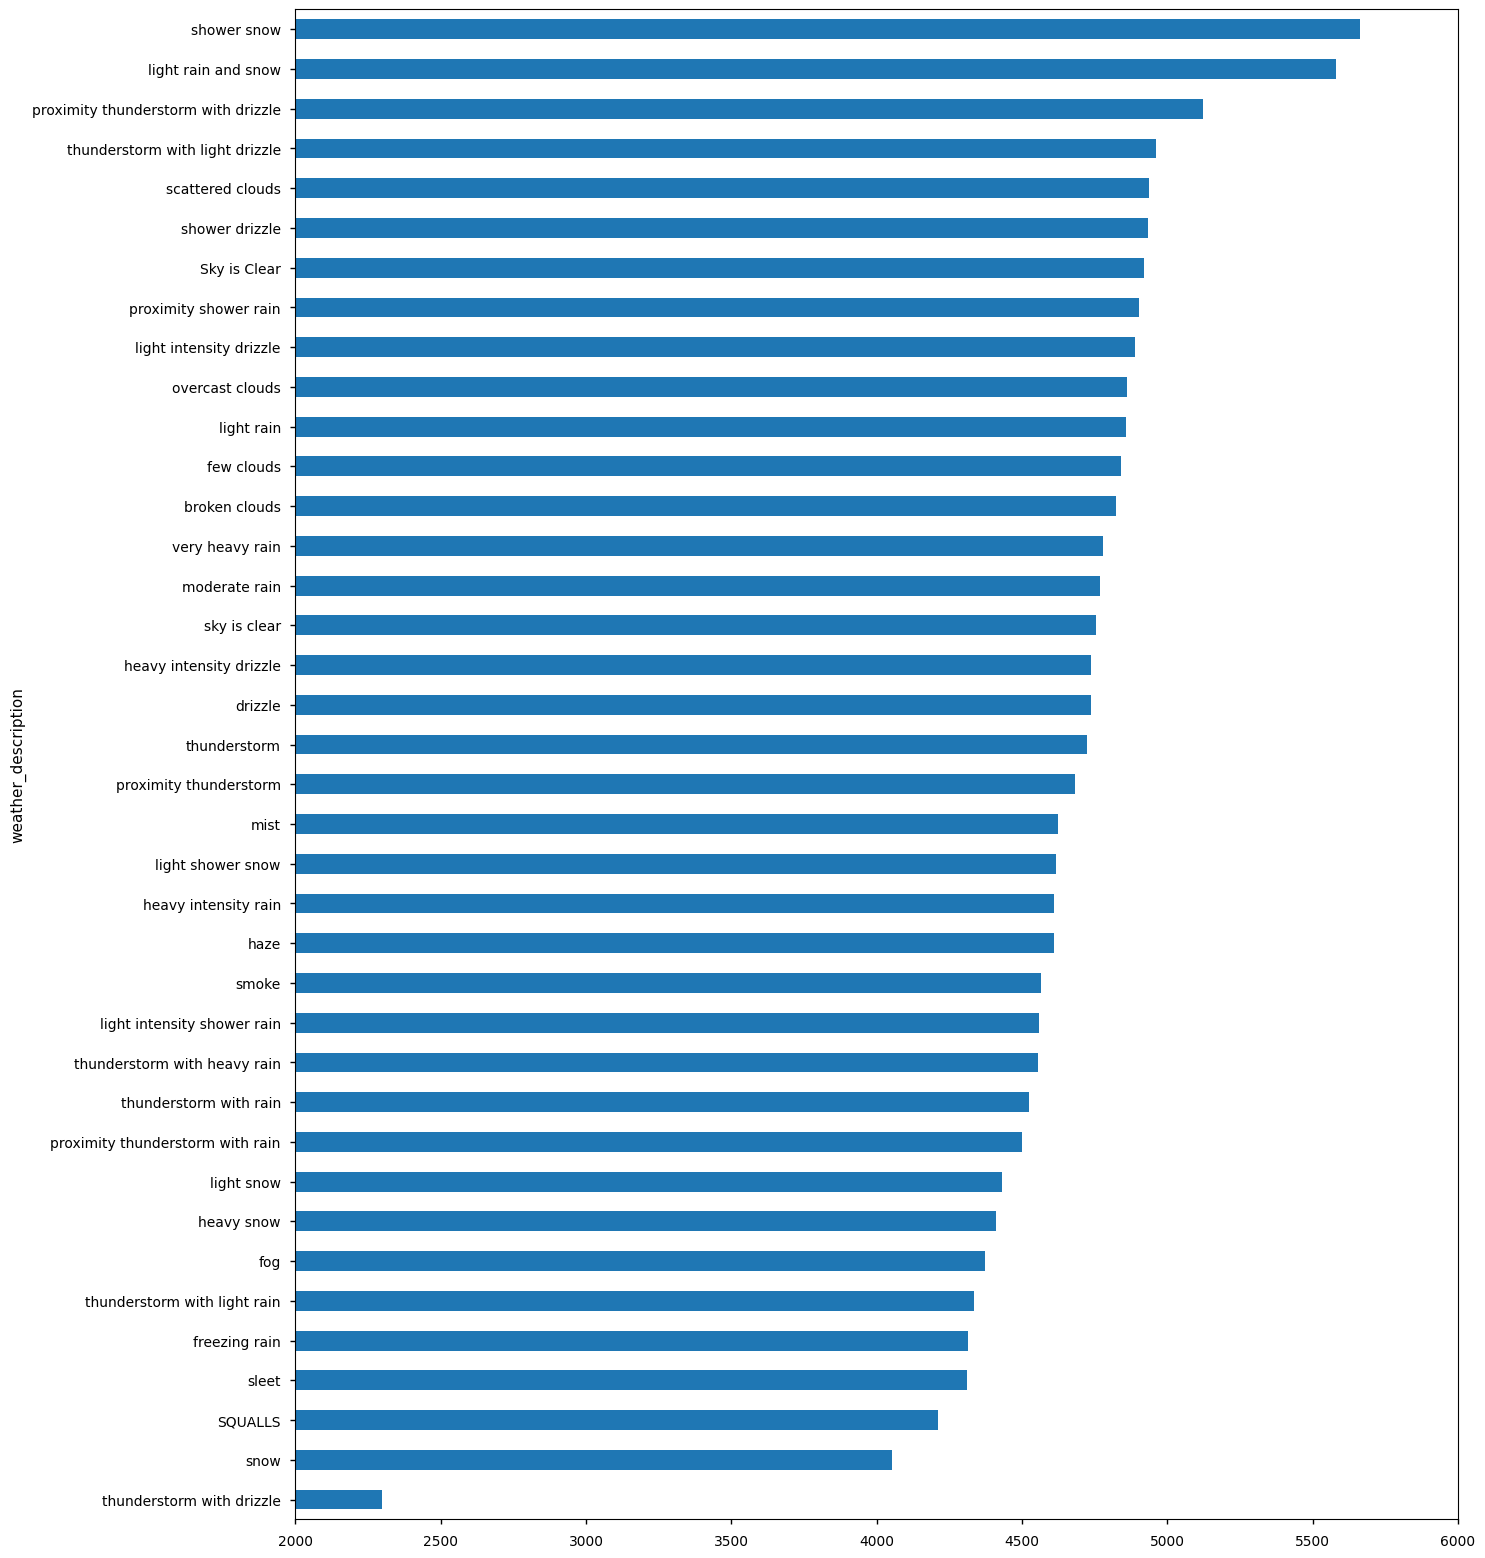

In [20]:
by_weather_description['traffic_volume'].plot.barh(figsize=(15,20))
plt.xlim(2000,6000)
plt.show()